# Problem: 

Imagine you are a GPS trying to find the shortest distance from the start to the destination. Using a graph to represent the transport network, each node is a junction and each edge is a road of a different length. Your task is to find the path from the start node 'A' to the destination node.

Here we use seven different search algorithms to find the path- Breadth-First Search (BFS), Depth-First Search (DFS), Uniform Cost Search (UCS), Depth-Limited Search (DLS), Iterative Deepening Search (IDS), A* Search, and Greedy Search (GS). The objective is to find which algorithm is the most efficient, and gives the most time-saving path.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue

In [12]:
# define the graph. each node is a junction connecting to different nodes with different distances of 'road' between them
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 8},
    'C': {'A': 4, 'F': 5},
    'D': {'B': 2, 'G': 3},
    'E': {'B': 8, 'H': 4},
    'F': {'C': 5, 'I': 6},
    'G': {'D': 3, 'J': 7},
    'H': {'E': 4, 'J': 6},
    'I': {'F': 6, 'J': 5},
    'J': {'G': 7, 'H': 6, 'I': 5}
}

# in order to calculate the heuristic for GS and A*, we decided to use the 'coordinates' of each junction/node 
# to estimate the straight-line distance between the node and the goal
# give random coordinates to each node
coordinates = {
    'A': (1, 3),
    'B': (2, 2),
    'C': (3, 3),
    'D': (2, 1),
    'E': (1, 1),
    'F': (3, 2),
    'G': (2, 0),
    'H': (1, 0),
    'I': (3, 1),
    'J': (2, -1)
}

goal = 'J' # destination is J
heuristic = {}
for node in coordinates:
    dx = coordinates[goal][0] - coordinates[node][0] # x axis distance
    dy = coordinates[goal][1] - coordinates[node][1] # y axis distance
    heuristic[node] = (dx ** 2 + dy ** 2) ** 0.5 # straight line distance using the formula ax^2 + bx^2 = c^2

In [13]:
start = 'A' # choose starting point A

 use 7 search algorithms to solve shortest path problem
 1. BFS - Breadth first search
 2. DFS - Depth first search
 3. UCS - Uniformed cost search
 4. DLS - Depth limited search
 5. IDS - Iterative deepening search
 6. A* - A* search
 7. GS - Greedy search

# Breadth-First Search

BFS: ['A', 'B', 'D', 'G', 'J']
Cost: 13


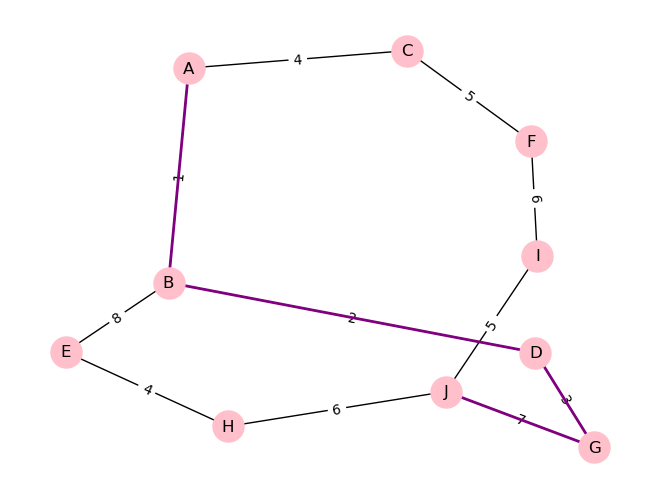

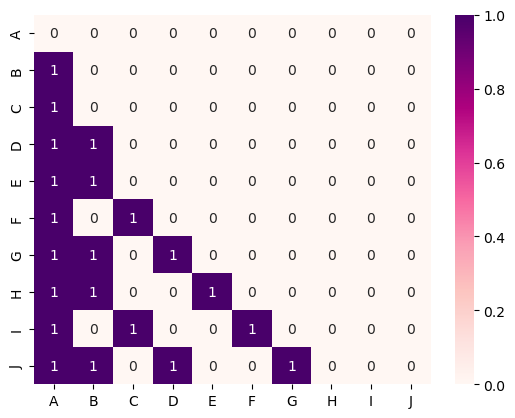

In [14]:
# BFS
# this algorithm does not consider the weight of each edge, or the 'length of the road'. 
# the order it visits the nodes in is determined by order in which they were found, 
# which is 'First In First Out' method, with a queue
def bfs(graph, start, goal):
    frontier = queue.Queue() # nodes to be visited
    frontier.put(start)
    visited = {start: None} # visited is a dictionary where each key is a visited node and value is the previous node from which it was visited
    while not frontier.empty():
        current = frontier.get() # remove node from queue
        if current == goal:
            break
        for next in graph[current]: # for each neighbour of current node
            if next not in visited: # if neighbour has not been visited
                frontier.put(next) # add it to the queue
                visited[next] = current # then add it to visited dictionary, with 'current' as the node it was visited from
    return visited

# function to get path
def get_path(visited, goal):
    if goal not in visited: # check if goal is in visited
        return None
    path = [] # empty list to store path
    current = goal # start from goal and work backwards
    while current is not None:
        path.append(current)
        current = visited[current]
    path.reverse()
    # get cost
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i + 1]]
    return path, cost

# plot graph with chosen route
def plot_graph(graph, path):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
        for neighbor in graph[node]:
            G.add_edge(node, neighbor, weight=graph[node][neighbor])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='pink')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    for i in range(len(path) - 1):
        nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1])], edge_color='purple', width=2)
    plt.show()

# plot heatmap
# the heatmap is a visualization of the process. each row and column represents a node.
# each row node represents a node the column nodes can reach. if coloured, indicates a connection
# you can plot the path from the heatmap, but the plot_graph function makes it easier to see the path.
# this is just to show the process of the search algorithm
def plot_heatmap(visited):
    
    nodes = list(visited.keys()) #get list of nodes from the visited dictionary and sort them
    nodes.sort()
    matrix = np.zeros((len(nodes), len(nodes))) #creating a matrix to represent the heatmap
    for i in range(len(nodes)):
        current = nodes[i]
        while current is not None:
            if current in visited:
                next = visited[current]
                if next is not None:
                    j = nodes.index(next)
                    matrix[i][j] = 1
            current = visited[current]
    heatmap(matrix, xticklabels=nodes, yticklabels=nodes, cmap='RdPu', annot=True)
    plt.show()

# run the search algorithms
visited = bfs(graph, start, goal)
path, cost = get_path(visited, goal)

#print the path and cost
print('BFS:', path)
print('Cost:', cost)

#plot graph with chosen route
plot_graph(graph, path)
#plot heatmap to visualize the process of the search algo
plot_heatmap(visited)


# Depth-First Search

DFS: ['A', 'C', 'F', 'I', 'J']
Cost: 20


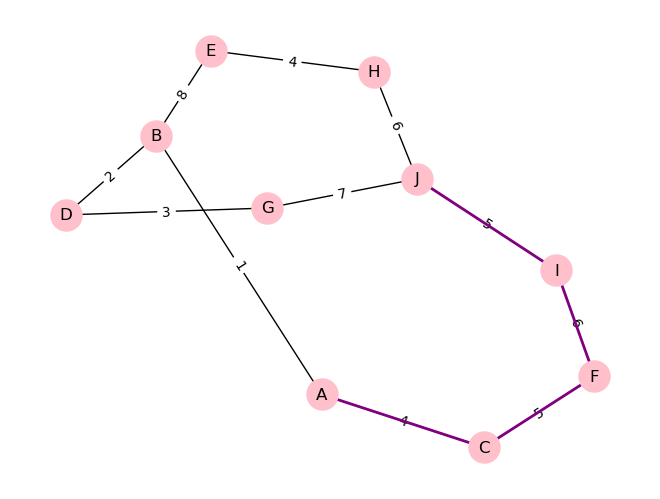

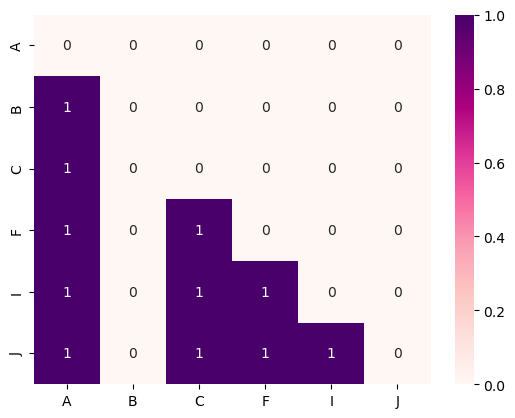

In [15]:
# DFS
# this algorithm does not consider the weight of each edge, or the 'length of the road'. 
# it uses a stack to determine the order in which nodes are visited, which is 'Last In First Out' method, instead of a queue like BFS
# the algorithm will visit the last node it found first, and then visit the neighbours of that node
def dfs(graph, start, goal):
    frontier = queue.LifoQueue() # stack of nodes to be visited
    frontier.put(start)
    visited = {start: None} # dict where keys are visited nodes, with previous node as value
    while not frontier.empty(): # while there are nodes to visit
        current = frontier.get() # remove from stack
        if current == goal:
            break
        for next in graph[current]: # for each neighbour of current node
            if next not in visited: # if neighbour has not been visited
                frontier.put(next) # add it to the stack
                visited[next] = current # then add to visited dict,'current' is the value 
    return visited

visited = dfs(graph, start, goal)
path, cost = get_path(visited, goal)
print('DFS:', path)
print('Cost:', cost)
plot_graph(graph, path)
plot_heatmap(visited)

# Depth-Limited Search

DLS: ['A', 'C', 'F', 'I', 'J']
Cost: 20


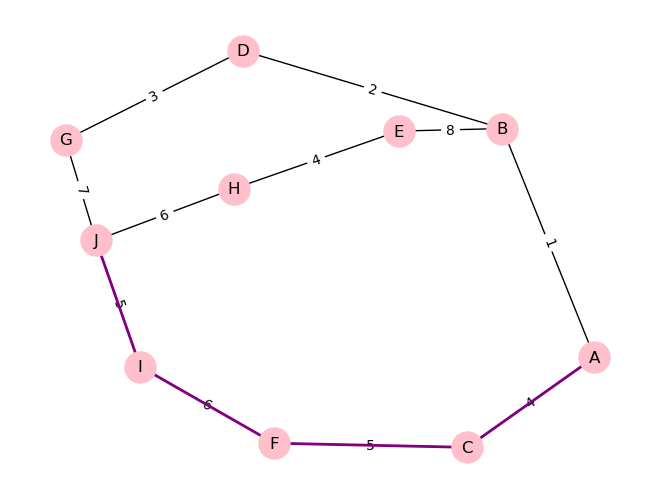

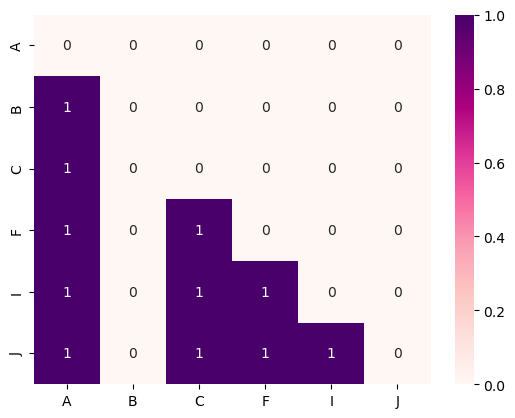

In [16]:
# DLS
# this algorithm is like DFS but there is a depth limit, the maximum number of nodes that can be visited
# the algorithm will visit the last node it found first, and then visit the neighbours of that node
# the depth limit is the maximum number of nodes that can be visited
# the algorithm will stop if the goal is found, or if the depth limit is reached
def dls(graph, start, goal, limit):
    frontier = queue.LifoQueue() # stack
    frontier.put((start, 0))  # store depth with each node
    visited = {start: None}
    while not frontier.empty():
        current, depth = frontier.get() # remove from stack
        if current == goal:
            break
        if depth < limit:  # only add neighbor if current depth is less than limit
            for next in graph[current]:
                if next not in visited:
                    frontier.put((next, depth + 1))  # increment depth for each neighbor
                    visited[next] = current
    return visited

visited = dls(graph, start, goal, 4) # example depth limit of 4. if liit is too small, goal won't be reachable
path, cost = get_path(visited, goal)
if path is not None:
    print('DLS:', path)
    print('Cost:', cost)
    plot_graph(graph, path)
    plot_heatmap(visited)
else:
    print('DLS: goal not reachable within depth limit')

# Uniform Cost Search

UCS: ['A', 'B', 'D', 'G', 'J']
Cost: 13


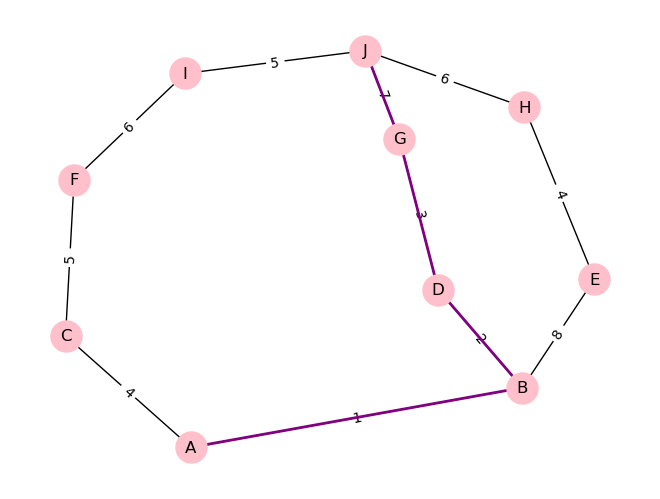

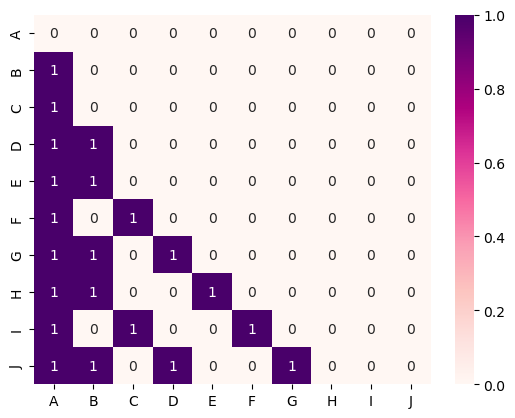

In [17]:
# UCS
#Uniform Cost Search algorithm finds the shortest path in a weighted graph by considering the cost of each edge.
#it explores the nodes with the lowest path cost first.
def ucs(graph, start, goal):
    frontier = queue.PriorityQueue()  #priority queue to store nodes ordered by their path costs
    frontier.put((0, start))  #start node with cost 0
    visited = {start: None}  #dictionary to store visited nodes and their predecessors
    cost = {start: 0}  #dictionary to store the cost of reaching each node from the start node
    while not frontier.empty():  #continuing until all nodes are explored
        current_cost, current = frontier.get()  #get the node with the lowest cost from the priority queue
        if current == goal:  #if goal node is reached, terminate the search
            break
        for next in graph[current]:  #explore neighbors of the current node
            new_cost = current_cost + graph[current][next]  #calculate the new cost to reach the neighbor
            if next not in cost or new_cost < cost[next]:  #if the new cost is lower than the existing cost to reach the neighbor
                cost[next] = new_cost  #update the cost to reach the neighbor
                frontier.put((new_cost, next))  #add the neighbor to the priority queue with its new cost
                visited[next] = current  #update the visited dictionary with the predecessor of the neighbor
    return visited  #return the visited dictionary containing the shortest path

#running the UCS algorithm
visited = ucs(graph, start, goal)
#get the path and cost from the visited dictionary
path, cost = get_path(visited, goal)
#print the path and cost
print('UCS:', path)
print('Cost:', cost)
#plot the graph with the chosen route highlighted
plot_graph(graph, path)
#plot the heatmap to visualize the process of the search algorithm
plot_heatmap(visited)

# Iterative Deepening Search

IDS: ['A', 'C', 'F', 'I', 'J']
Cost: 20


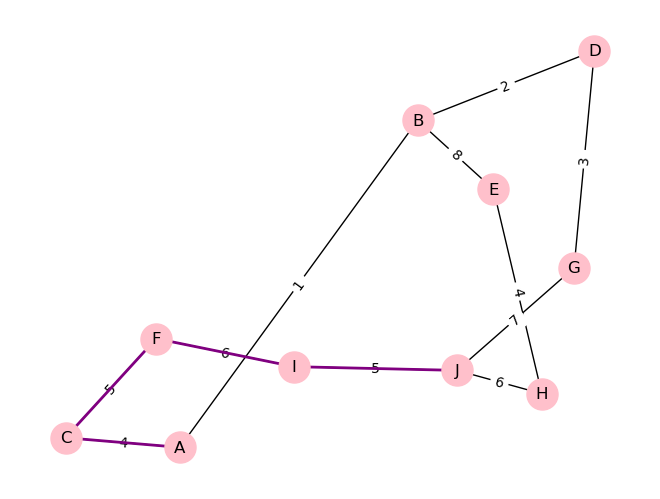

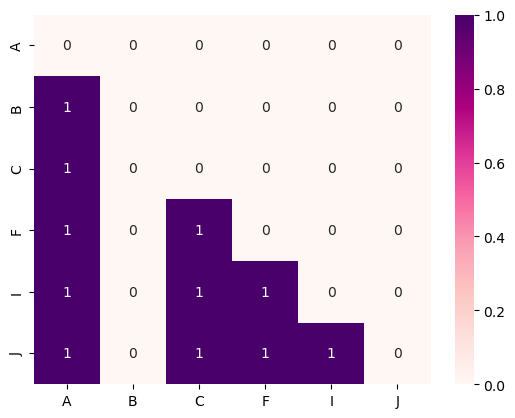

In [18]:
# IDS
def ids(graph, start, goal):
    limit = 0 #Initialize the depth limit starting from 0.
    while True: #Continuously increase the depth limit until the goal is found.
        visited = dls(graph, start, goal, limit) #Perform Depth-Limited Search (DLS) with the current limit.
        if goal in visited: #If the goal was found within the current depth limit.
            return visited #Return the nodes visited during the successful search.
        limit += 1 #Increase the depth limit for the next iteration.

visited = ids(graph, start, goal)
path, cost = get_path(visited, goal)
print('IDS:', path)
print('Cost:', cost)
plot_graph(graph, path)
plot_heatmap(visited)

# A* Search

A*: ['A', 'B', 'D', 'G', 'J']
Cost: 13


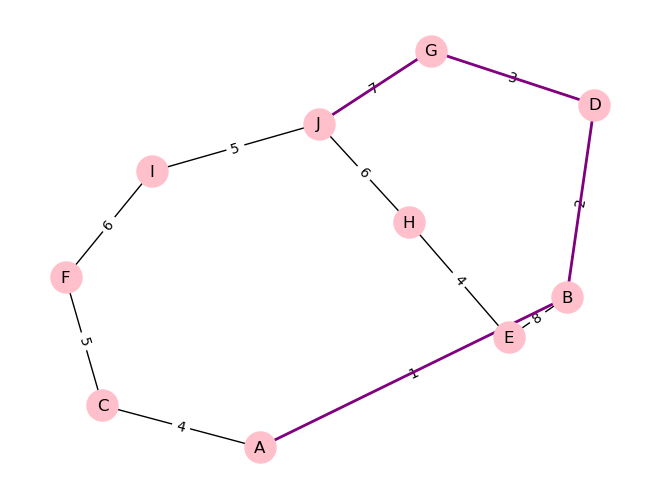

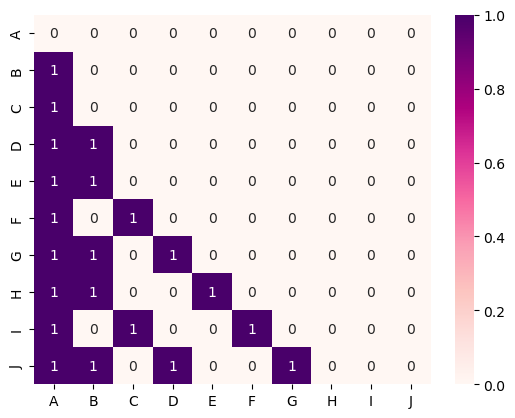

In [19]:
# A*
def a_star(graph, start, goal, heuristic):
    frontier = queue.PriorityQueue() #Initialize a priority queue for the frontier nodes.
    frontier.put((0, start)) #Start with the start node, priority is 0.
    visited = {start: None} #Tracks the best path to each node.
    cost = {start: 0} #Tracks the cost to reach each node.
    while not frontier.empty(): #Continues until there are no nodes left to explore.
        current_cost, current = frontier.get() #Getting the node from the frontier with the lowest cost (priority).
        if current == goal: #If the current node is the goal, then stop searching.
            break
        for next in graph[current]: #Explore all the neighbours of the current node.
            new_cost = cost[current] + graph[current][next] #Calculate the new cost to reach the next node.
            if next not in cost or new_cost < cost[next]: #If the next node hasn't been visited or we've found a cheaper path to it.
                cost[next] = new_cost #Update the cost to reach the next node.
                priority = new_cost + heuristic[next] #Calculate priority with heuristic.
                
                frontier.put((priority, next)) #Add the next node to the frontier with its priority.
                visited[next] = current #Record how we reached this next node.
    return visited #Return the visited nodes to reconsstruct the path.

visited = a_star(graph, start, goal, heuristic) #Using the A* function.
path, cost = get_path(visited, goal)
print('A*:', path)
print('Cost:', cost)
plot_graph(graph, path) #Plotting a graph to visualise the path.
plot_heatmap(visited) 


# Greedy Search

GS: ['A', 'B', 'D', 'G', 'J']
Cost: 13


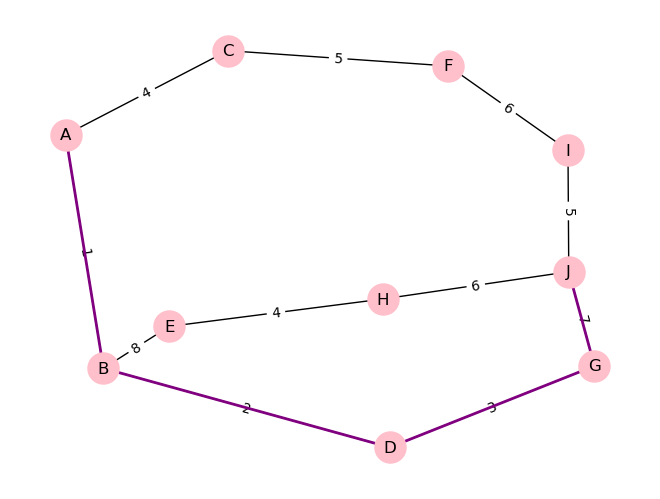

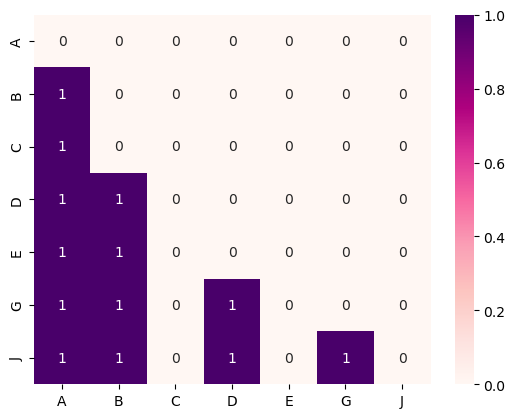

In [20]:
# GS
# Greedy Search is similar to A* but it will visit the node that is closest to the goal based only on the heuristic
# which is the straight line distance between the node and the goal based on the coordinates
# it doesn't consider the cost of the edge, the 'length of the road'
def gs(graph, start, goal, heuristic):
    frontier = queue.PriorityQueue() # priority queue
    frontier.put((0, start)) 
    visited = {start: None} # visited nodes
    while not frontier.empty():
        _, current = frontier.get() # remove from queue
        if current == goal:
            break
        for next in graph[current]: # for each neighbour of current node
            if next not in visited:
                priority = heuristic[next] #this part makes it different from A*. it uses only heuristic   
                frontier.put((priority, next))
                visited[next] = current
    return visited

visited = gs(graph, start, goal, heuristic)
path, cost = get_path(visited, goal)
print('GS:', path)
print('Cost:', cost)
plot_graph(graph, path)
plot_heatmap(visited)